## RNN Example for Time Series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('RSCCASN.csv',index_col='DATE',parse_dates=True)

In [3]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [4]:
df.columns=['Sales']

In [5]:
df.head()

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


<Axes: xlabel='DATE'>

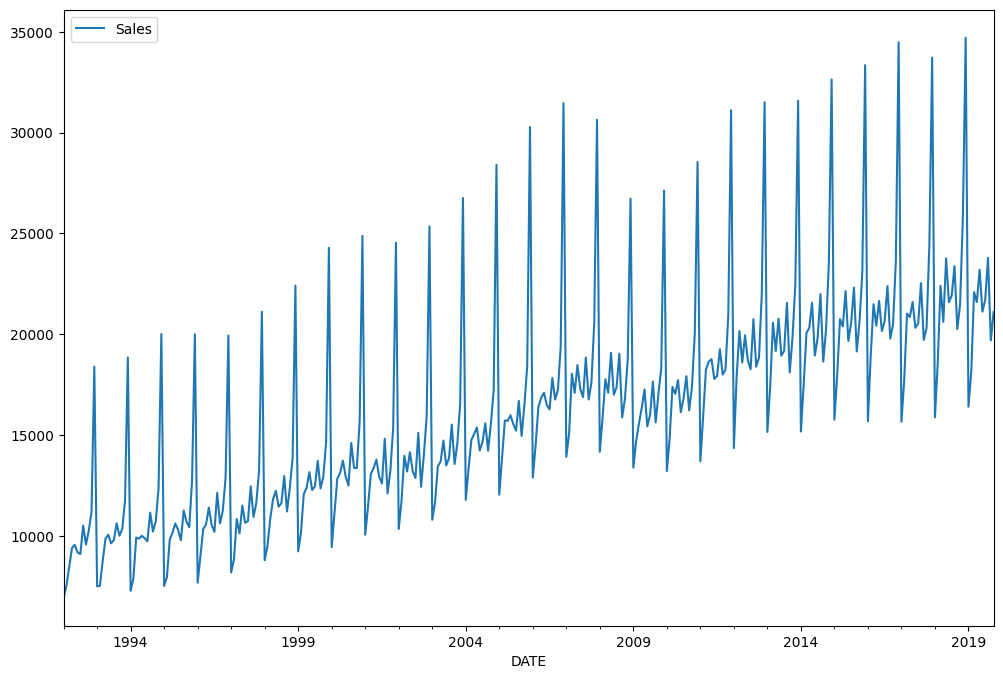

In [6]:
df.plot(figsize=(12,8))

## Train Test Split

In [9]:
len(df)/18

18.555555555555557

In [10]:
len(df)-18

316

In [11]:
test_ind=len(df)-18

In [12]:
train=df.iloc[:test_ind]
test=df.iloc[test_ind:]

In [13]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


## Scale Data

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler=MinMaxScaler()

In [16]:
scaled_train=scaler.fit_transform(train)
scaled_test=scaler.transform(test)

## Time Series Generator

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [18]:
length=12
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [21]:
len(generator)

304

In [28]:
X,y=generator[1]

In [30]:
X

array([[[0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266],
        [0.02047633]]])

In [29]:
y

array([[0.02127505]])

In [36]:
scaled_train[13]

array([0.02127505])

## Create the Model

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [38]:
n_features = 1

In [39]:
model =Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

C:\Users\fakthar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [43]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

In [44]:
# fit model
model.fit(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
 36/304 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0497

C:\Users\fakthar\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0278 - val_loss: 0.0461
Epoch 2/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0206 - val_loss: 0.0320
Epoch 3/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0129 - val_loss: 0.0343
Epoch 4/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0066 - val_loss: 0.0024
Epoch 5/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0030 - val_loss: 0.0153
Epoch 6/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0024 - val_loss: 0.0013
Epoch 7/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0027 - val_loss: 5.6829e-04
Epoch 8/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.8834e-04 - val_loss: 5.0550e-04
Epoch 9/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011 - val_loss: 0.0023
Epoch 10/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0014 - val_loss: 6.1401e-04


In [45]:
losses = pd.DataFrame(model.history.history)

<Axes: >

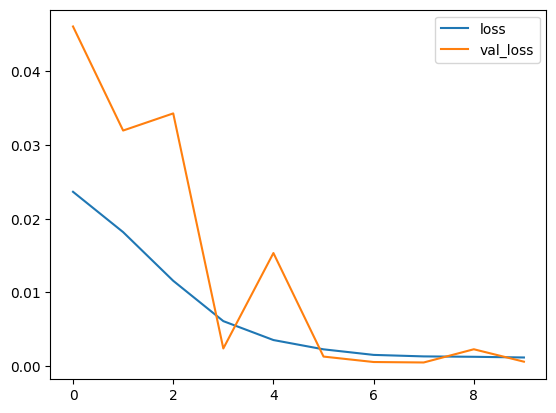

In [46]:
losses.plot()

In [47]:
first_eval_batch = scaled_train[-length:]

In [48]:
first_eval_batch

array([[0.53252977],
       [0.48591345],
       [0.49364653],
       [0.56629393],
       [0.46405751],
       [0.48536886],
       [0.63534708],
       [0.97233517],
       [0.32468051],
       [0.42285071],
       [0.5615016 ],
       [0.49658728]])

In [49]:
scaled_test

array([[0.61087714],
       [0.53191258],
       [0.54389341],
       [0.59697212],
       [0.4836625 ],
       [0.52770113],
       [0.68592071],
       [1.00813244],
       [0.34388615],
       [0.40647691],
       [0.55021057],
       [0.53220302],
       [0.59040081],
       [0.51499419],
       [0.53645077],
       [0.61185739],
       [0.46314987],
       [0.51463114]])

In [50]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [51]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


array([[0.5040295]], dtype=float32)

In [52]:
scaled_test[0]

array([0.61087714])

In [53]:
test_predictions = []
count=0
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    count+=1
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [54]:
current_batch

array([[[0.60519445],
        [0.94656861],
        [0.31432149],
        [0.40502807],
        [0.52514404],
        [0.47184107],
        [0.47936881],
        [0.44992489],
        [0.4533754 ],
        [0.49976021],
        [0.43561438],
        [0.45731887]]])

In [56]:
test_predictions

[array([0.5040295], dtype=float32),
 array([0.4664726], dtype=float32),
 array([0.47186884], dtype=float32),
 array([0.53096926], dtype=float32),
 array([0.44863755], dtype=float32),
 array([0.47073403], dtype=float32),
 array([0.60519445], dtype=float32),
 array([0.9465686], dtype=float32),
 array([0.3143215], dtype=float32),
 array([0.40502807], dtype=float32),
 array([0.52514404], dtype=float32),
 array([0.47184107], dtype=float32),
 array([0.4793688], dtype=float32),
 array([0.4499249], dtype=float32),
 array([0.4533754], dtype=float32),
 array([0.4997602], dtype=float32),
 array([0.43561438], dtype=float32),
 array([0.45731887], dtype=float32)]

In [57]:
current_pred

array([0.45731887], dtype=float32)

In [58]:
count

18

## Inverse Transformation and Compare

In [59]:
true_predictions=scaler.inverse_transform(test_predictions)

In [60]:
test['Predictions']=true_predictions

C:\Users\fakthar\AppData\Local\Temp\ipykernel_7224\2664784394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions']=true_predictions


In [63]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,20820.988890
2018-06-01,21589,19786.521182
2018-07-01,21919,19935.155407
2018-08-01,23381,21563.017356
2018-09-01,20260,19295.272542
2018-10-01,21473,19903.898123
2018-11-01,25831,23607.475915
2018-12-01,34706,33010.285747
2019-01-01,16410,15595.671069


<Axes: xlabel='DATE'>

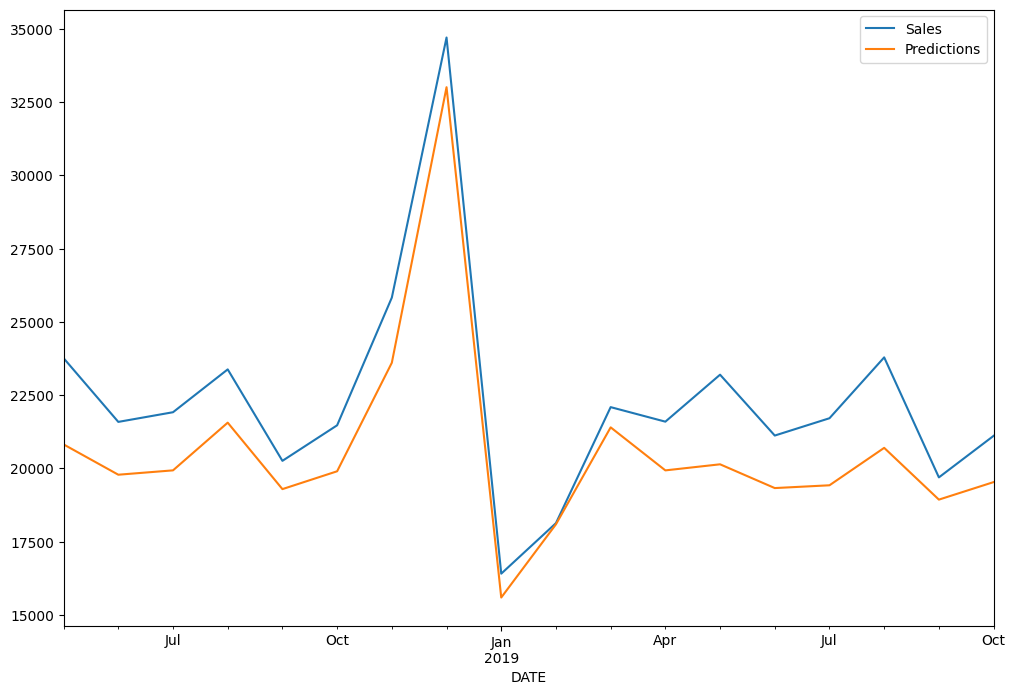

In [64]:
test.plot(figsize=(12,8))

## Retrain and Forecasting

# It is mean by ,in first phase we seperate the data into train and test ,but in actual we cant have test data so we taking entire data set has a single set 

In [65]:
full_scaler=MinMaxScaler()
scaled_full_data=full_scaler.fit_transform(df)

In [66]:
length=12
generator=TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=1)

In [68]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# fit model
model.fit(generator,epochs=8)

Epoch 1/8


C:\Users\fakthar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 85/322 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0941  

C:\Users\fakthar\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0478
Epoch 2/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0149
Epoch 3/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0125
Epoch 4/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0055
Epoch 5/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0057
Epoch 6/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0017
Epoch 7/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012
Epoch 8/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012


In [69]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [70]:
forecast = scaler.inverse_transform(forecast)

In [71]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [72]:
forecast_index = pd.date_range(start='2019-11-01',periods=periods,freq='MS')

In [73]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [74]:
forecast_df

,Forecast
2019-11-01,26120.693597
2019-12-01,36136.565839
2020-01-01,17307.374745
2020-02-01,19125.265191
2020-03-01,22449.651192
2020-04-01,22007.142015
2020-05-01,23431.038648
2020-06-01,21610.486925
2020-07-01,22169.604703
2020-08-01,24017.399631


<Axes: >

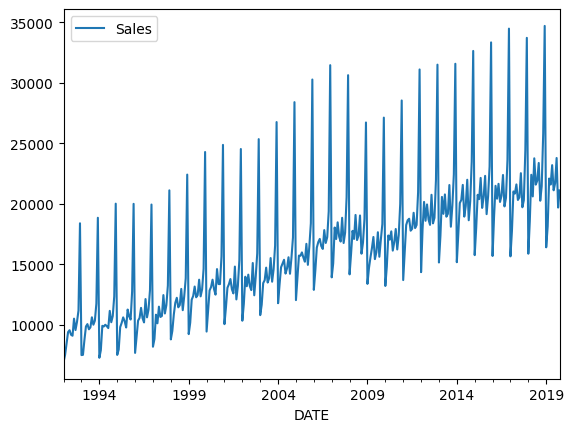

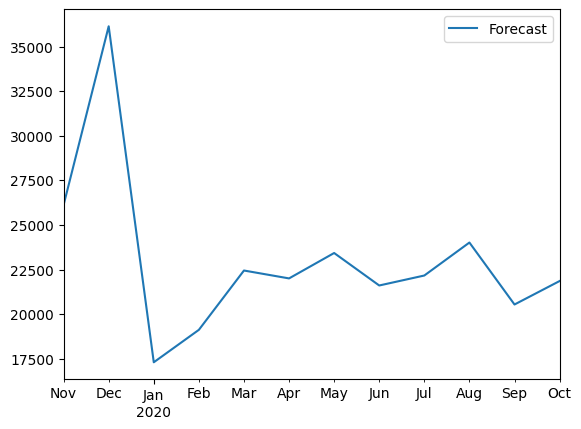

In [75]:
df.plot()
forecast_df.plot()

<Axes: xlabel='DATE'>

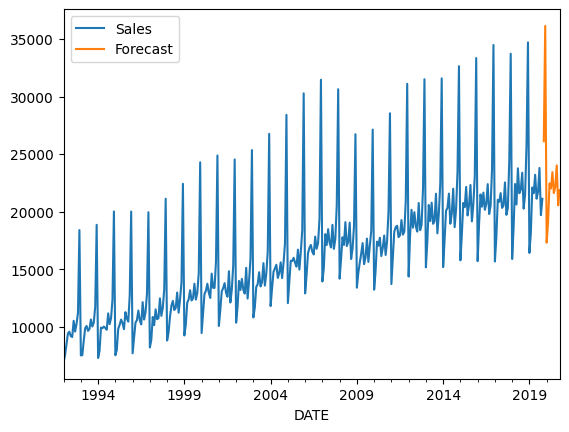

In [76]:
ax = df.plot()
forecast_df.plot(ax=ax)

(576.0, 611.0)

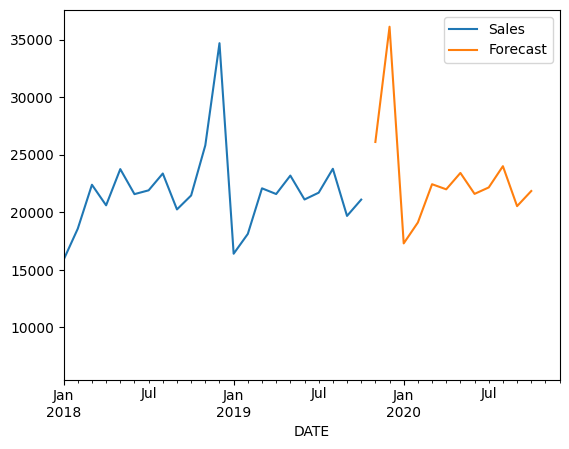

In [77]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')

## Great Job